## Fitting model to data. We start with fitting to a line. ie Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
import seaborn as sns; sns.set()

In [4]:
data = pd.DataFrame(
    [
        [5,7,12,16,20],
        [4,12,18,21,24]
    ],
    index=['x','y'])

# use numpy to take the transform of data
data_T = data.T
data.T

,x,y
0,5,4
1,7,12
2,12,18
3,16,21
4,20,24


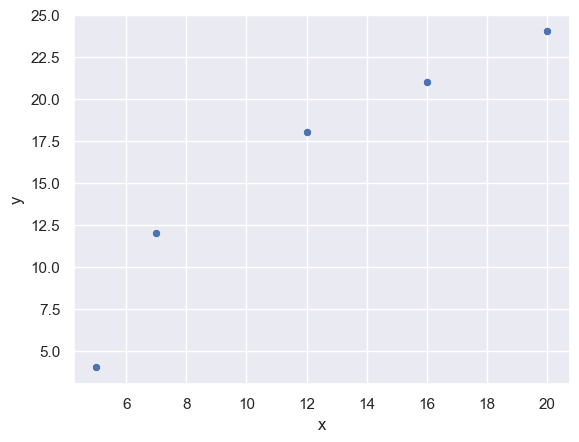

In [5]:
sns.scatterplot(x='x', y='y', data=data_T)
plt.show()

In [7]:
df_x=data_T.iloc[:,0] 
df_y=data_T.iloc[:,1]
slope, intercept, r_value, p_value, std_err = linregress(df_x,df_y)

print(f'The equation of regression line is y={slope:.3f}x+{intercept:.3f}')

The equation of regression line is y=1.221x+1.151


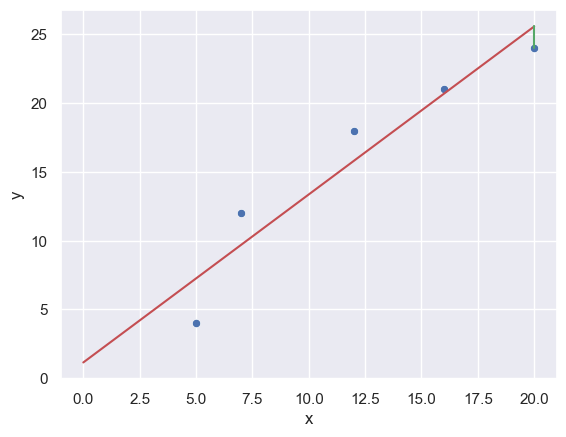

In [11]:
X_plot = np.linspace(0,20,100)
Y_plot = slope*X_plot+intercept
sns.scatterplot(x='x', y='y', data=data_T)
plt.plot(X_plot, Y_plot, color='r')

y1 = slope*df_x+intercept
for i in range(len(df_x)):
    xx = [df_x[i],df_x[i]]
    yy = [df_y[i],y1[i]]
plt.plot(xx,yy, c='g')
plt.show()

## How good is the fit?  How do we measure goodness of fit?

In [13]:
def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean()


print(f'mean square error: {mse(df_y, slope*df_x +intercept)}')

mean square error: 4.658701298701301


## mean and standard deviation of the data

In [14]:
data_T.mean()

x    12.0
y    15.8
dtype: float64

In [19]:
data_T.std(ddof=1)

x    6.204837
y    7.949843
dtype: float64

In [16]:
# Covariance - std.std 
data_T.cov()

,x,y
x,38.5,47.0
y,47.0,63.2


In [ ]:
## use st.linregress to calculate regression line

In [18]:
import scipy.stats as st
import statsmodels.api as sm
x = data_T['x']
y = data_T['y']

distribution = getattr(st, 'linregress')
params = distribution(x,y)
params

LinregressResult(slope=1.2207792207792207, intercept=1.1506493506493527, rvalue=0.9528158084435786, pvalue=0.01221604904481553, stderr=0.2245414109335736)